## Run only below if you already installed the requirements in `.venv`, then refresh Jupyter lab to give you the `.venv` kernel

In [2]:
!.venv/bin/python3 -m ipykernel install --name=.venv

0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
Installed kernelspec .venv in /usr/local/share/jupyter/kernels/.venv


## Otherwise, if you didn't installer the requirements in `.venv` yet, follow below

In [1]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
gpus

2024-06-20 14:05:23.628632: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-20 14:05:29.277215: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-06-20 14:05:36.498853: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-20 14:05:36.692139: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. 

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


2024-06-20 14:05:36.703857: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-20 14:05:36.704180: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-20 14:05:36.704348: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [3]:
!nvidia-smi

Mon Jun 17 22:41:23 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.116.04   Driver Version: 525.116.04   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Quadro RTX 4000     Off  | 00000000:00:05.0 Off |                  N/A |
| 30%   26C    P0    35W / 125W |    281MiB /  8192MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
import torch
torch.cuda.memory_summary(device=None, abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |      0 B   |      0 B   |      0 B   |      0 B   |\n|       from large pool |      0 B   |      0 B   |      0 B   |      0 B   |\n|       from small pool |      0 B   |      0 B   |      0 B   |      0 B   |\n|---------------------------------------------------------------------------|\n| Active memory         |      0 B   |      0 B   |      0 B   |      0 B   |\n|       from large pool |      0 B   |      0 B   |

In [5]:
torch.cuda.empty_cache()

In [6]:
from os import path
root_path = path.abspath('./')

In [7]:
!apt-get install -y graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-liberation libann0 libcdt5 libcgraph6 libgts-0.7-5 libgts-bin libgvc6
  libgvpr2 liblab-gamut1 libpathplan4
Suggested packages:
  gsfonts graphviz-doc
The following NEW packages will be installed:
  fonts-liberation graphviz libann0 libcdt5 libcgraph6 libgts-0.7-5 libgts-bin
  libgvc6 libgvpr2 liblab-gamut1 libpathplan4
0 upgraded, 11 newly installed, 0 to remove and 100 not upgraded.
Need to get 4678 kB of archives.
After this operation, 10.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-liberation all 1:1.07.4-11 [822 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libann0 amd64 1.1.2+doc-7build1 [26.0 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcdt5 amd64 2.42.2-6 [21.1 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64

In [8]:
!pip install virtualenv ipykernel
!virtualenv --system-site-packages .venv
!source .venv/bin/activate
!.venv/bin/pip install -r ../requirements.txt
# to generate the requirements.txt
# !.venv/bin/pipreqs --ignore .venv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 50.4 MB/s eta 0:00:0000:010:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 64.5 MB/s eta 0:00:00
created virtual environment CPython3.11.7.final.0-64 in 1776ms
  creator CPython3Posix(dest=/notebooks/hair-colorization/src/.venv, clear=False, no_vcs_ignore=False, global=True)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: keras==3.3.3, markdown_it_py==3.0.0, mdurl==0.1.2, ml_dtypes==0.3.2, namex==0.0.8, numpy==1.26.4, nvidia_cublas_cu12==12.3.4.1, nvidia_cuda_cupti_cu12==12.3.101, nvidia_cuda_nvcc_cu12==12.3.107, nvidia_cuda_nvrtc_cu12==12.3.107, nvidia_cuda_runtime_cu12==12.3.101, nvidia_cuda_runtime_cu12==12.5.39, nvidia_cudnn_cu12==8.9.7.29, nvidia_cufft_cu12==11.0.12.1, nvidia_curand_cu12==10.3.4.107, nvidia_cusolver_cu12==11.5.4.101, nvidia_cusparse_cu12==12.2.0.103, nvidia_nccl_cu12==2.19.3, nvidia_n

In [1]:
!.venv/bin/python3 -m ipykernel install --name=.venv

0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
Installed kernelspec .venv in /usr/local/share/jupyter/kernels/.venv


# Nix alternative

In [1]:
!nix-shell --run "python -m ipykernel install --name=nix-env"

/bin/bash: line 1: nix-shell: command not found


# Now refresh the `Jupyter lab` in the browser and connect the Kernel to `.venv`
After running below cell, the keras version must be 3.3.3

In [1]:
import keras
import tensorflow as tf
import glob
import os
from os import path
root_path = path.abspath('./')
print(keras.__version__)

2024-06-21 15:02:40.784649: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-21 15:02:45.292651: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


3.3.3


# Prepare dataset
If you have the zip file move to the next cell, otherwise below cell is the way to go.

In [2]:
# Do this first time loading `mod` in this kernel, otherwise, run only below cell
import importlib
segment_mod = importlib.import_module("hair_segment")

In [7]:
# Run this one if this is the second time you are loading the `mod`
from importlib import reload
reload(segment_mod)

<module 'hair_segment' from '/notebooks/hair-colorization/src/hair_segment.py'>

In [3]:
segmenter = segment_mod.HairSegment()

In [4]:
segmenter.load_model(os.path.abspath(root_path + f'/../model/best.pt'))

In [10]:
labels_dir = os.path.abspath(root_path + f'/../label-dataset/train/labels')
!mkdir -p {labels_dir}
labels_dir

'/notebooks/hair-colorization/label-dataset/train/labels'

In [ ]:
image_dir = os.path.abspath(root_path + f'/../dataset/train/images')
segmenter.make_dataset(image_dir, root_path + f'/../label-dataset/train/labels')

image_path: /notebooks/hair-colorization/dataset/train/images/jas-rolyn-k5IO23B09cU-unsplash_jpg.rf.496600f5873784ed31b1135a329c3fbd.jpg
data_output_path: /notebooks/hair-colorization/src/../label-dataset/train/labels/jas-rolyn-k5IO23B09cU-unsplash_jpg.rf.496600f5873784ed31b1135a329c3fbd.json

0: 640x640 1 hair, 77.5ms
Speed: 4.5ms preprocess, 77.5ms inference, 1405.4ms postprocess per image at shape (1, 3, 640, 640)
area: 21584
expand_factor: 61
vectorized_pixels len: 51652
K: 3
K: 4
K: 5
K: 6
K: 7
label_img shape: (640, 640)
count_hair_label: [4095, 4388, 1344, 3662, 785, 3961, 3349]
count_not_hair_label: [2508, 1223, 7956, 11031, 808, 5880, 662]
hairy_label: {0, 1, 6}
data: {'min_hue': 0, 'max_hue': 179, 'mean_hue': 14, 'median_hue': 11, 'mode_hue': 179}
data: {'min_hue': 0, 'max_hue': 179, 'mean_hue': 14, 'median_hue': 11, 'mode_hue': 179}
image_path: /notebooks/hair-colorization/dataset/train/images/man-face-head-shoulder-neck-sleeve-1664640-pxhere-com_jpg.rf.fca77c2b90276df37f5af

/notebooks/hair-colorization/src/hair_segment.py:223: RuntimeWarning: overflow encountered in scalar add
  median_hue = np.uint8((sample_in_hue[middle] + sample_in_hue[middle + 1]) / 2)


area: 2585
expand_factor: 22
vectorized_pixels len: 5854
K: 3
K: 4
K: 5
K: 6
K: 7
K: 8
label_img shape: (640, 640)
count_hair_label: [330, 74, 1049, 168, 0, 951, 9, 4]
count_not_hair_label: [508, 824, 267, 617, 235, 58, 643, 117]
hairy_label: {2, 5}
data: {'min_hue': 0, 'max_hue': 177, 'mean_hue': 49, 'median_hue': 15, 'mode_hue': 170}
data: {'min_hue': 0, 'max_hue': 177, 'mean_hue': 49, 'median_hue': 15, 'mode_hue': 170}
image_path: /notebooks/hair-colorization/dataset/train/images/pexels-olena-neva-1021693_jpg.rf.f3ae0a6292b8a5efb1c2b3745c7bcac8.jpg
data_output_path: /notebooks/hair-colorization/src/../label-dataset/train/labels/pexels-olena-neva-1021693_jpg.rf.f3ae0a6292b8a5efb1c2b3745c7bcac8.json

0: 640x640 1 hair, 77.5ms
Speed: 2.0ms preprocess, 77.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
area: 34746
expand_factor: 78
vectorized_pixels len: 80771
K: 3
K: 4
K: 5
K: 6
K: 7
K: 8
K: 9
K: 10
label_img shape: (640, 640)
count_hair_label: [8610, 1665, 1341, 4

In [5]:
image_dir = os.path.abspath(root_path + f'/../dataset/train/images')
segmenter.make_dataset(image_dir, root_path + f'/../label-dataset/train/labels')

image_path: /notebooks/hair-colorization/dataset/train/images/jas-rolyn-k5IO23B09cU-unsplash_jpg.rf.496600f5873784ed31b1135a329c3fbd.jpg
data_output_path: /notebooks/hair-colorization/src/../label-dataset/train/labels/jas-rolyn-k5IO23B09cU-unsplash_jpg.rf.496600f5873784ed31b1135a329c3fbd.json
image_path: /notebooks/hair-colorization/dataset/train/images/man-face-head-shoulder-neck-sleeve-1664640-pxhere-com_jpg.rf.fca77c2b90276df37f5af9921a4d7961.jpg
data_output_path: /notebooks/hair-colorization/src/../label-dataset/train/labels/man-face-head-shoulder-neck-sleeve-1664640-pxhere-com_jpg.rf.fca77c2b90276df37f5af9921a4d7961.json
image_path: /notebooks/hair-colorization/dataset/train/images/pexels-pixabay-206505_jpg.rf.3652143870cbd8be6ca97700646d4128.jpg
data_output_path: /notebooks/hair-colorization/src/../label-dataset/train/labels/pexels-pixabay-206505_jpg.rf.3652143870cbd8be6ca97700646d4128.json
image_path: /notebooks/hair-colorization/dataset/train/images/haitian-3625003_jpg.rf.70097

/notebooks/hair-colorization/src/hair_segment.py:223: RuntimeWarning: overflow encountered in scalar add
  median_hue = np.uint8((sample_in_hue[middle] + sample_in_hue[middle + 1]) / 2)


area: 8868
expand_factor: 40
vectorized_pixels len: 18941
K: 3
K: 4
label_img shape: (640, 640)
count_hair_label: [2003, 3528, 187, 3150]
count_not_hair_label: [3298, 1712, 4276, 787]
hairy_label: {1, 3}
data: {'min_hue': 0, 'max_hue': 179, 'mean_hue': 12, 'median_hue': 13, 'mode_hue': 179}
data: {'min_hue': 0, 'max_hue': 179, 'mean_hue': 12, 'median_hue': 13, 'mode_hue': 179}
image_path: /notebooks/hair-colorization/dataset/train/images/tim-mossholder-DjfZR-yKaI8-unsplash_jpg.rf.dd52ff2a376fe2f9596117e3fdd69b28.jpg
data_output_path: /notebooks/hair-colorization/src/../label-dataset/train/labels/tim-mossholder-DjfZR-yKaI8-unsplash_jpg.rf.dd52ff2a376fe2f9596117e3fdd69b28.json

0: 640x640 2 hairs, 26.3ms
Speed: 1.6ms preprocess, 26.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
area: 25395
expand_factor: 67
vectorized_pixels len: 63073
K: 3
K: 4
K: 5
K: 6
label_img shape: (640, 640)
count_hair_label: [611, 6956, 2521, 10672, 1951, 2684]
count_not_hair_label: [5589, 

upload the zip file

In [ ]:
os.chdir(root_path)
!unzip dataset-20240528T142552Z-001.zip -d dataset
!mv {root_path}/dataset/dataset/* {root_path}/dataset

In [11]:
!unzip image-dataset-20240529T203424Z-001.zip -d image-dataset
!mv {root_path}/image-dataset/image-dataset/* {root_path}/image-dataset

Archive:  image-dataset-20240529T203424Z-001.zip
  inflating: image-dataset/image-dataset/data.yaml  
   creating: image-dataset/image-dataset/train/labels/
  inflating: image-dataset/image-dataset/test/labels/01059-3887185467_png.rf.46f7cb0be09dfab63cfe3c5a1cd981e4.txt  
  inflating: image-dataset/image-dataset/test/labels/00494-3887184902_png.rf.db3bf933f242f6d34c199314e5ddb682.txt  
  inflating: image-dataset/image-dataset/test/labels/00242-3887184650_png.rf.46bf36f2fb6bfbca8045b1165bf5c561.txt  
  inflating: image-dataset/image-dataset/test/labels/00994-3887185402_png.rf.1f61115362d86eaaaaa49e7700f51af8.txt  
  inflating: image-dataset/image-dataset/test/labels/boy-1830688_jpg.rf.59e95f91de3f737b5898c1f5b49a3e45.txt  
  inflating: image-dataset/image-dataset/test/labels/pelageya-golub-gKp3eJzhMIA-unsplash_jpg.rf.9b9c2b13e1c679f52b53483b31ee6bf4.txt  
  inflating: image-dataset/image-dataset/test/labels/00485-3887184893_png.rf.3d956dff82d4b2fe41372fdacf33f880.txt  
  inflating: imag

# Training

In [1]:
import keras
import tensorflow as tf
import glob
import os
from os import path
root_path = path.abspath('./')
print(keras.__version__)

2024-06-24 03:55:28.355429: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-24 03:55:34.142787: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


3.3.3


In [2]:
# Do this first time loading `mod` in this kernel, otherwise, run only below cell
import importlib
mod = importlib.import_module("hair_colorization")

In [3]:
# Run this one if this is the second time you are loading the `mod`
from importlib import reload
reload(mod)

<module 'hair_colorization' from '/notebooks/hair-colorization/src/hair_colorization.py'>

In [4]:
trainer = mod.HairColorization(240, 240)

In [6]:
trainer.define_model_step_1()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector_10    │ (None, 57600, 1)  │          0 │ input_layer_5[0]… │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_4       │ (None, 240, 240,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_10          │ (None, 240, 240,  │          0 │ repeat_vector_10… │
│ (Reshape)           │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_10      │ (None, 240, 240,  │          0 │ input_layer_4[0]… │
│ (Concatenate)       │ 4)                │            │ reshape_10[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector_11    │ (None, 14400, 1)  │          0 │ input_layer_5[0]… │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ step_1_en_conv2d_1… │ (None, 120, 120,  │      4,736 │ concatenate_10[0… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_11          │ (None, 120, 120,  │          0 │ repeat_vector_11… │
│ (Reshape)           │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_11      │ (None, 120, 120,  │          0 │ step_1_en_conv2d… │
│ (Concatenate)       │ 129)              │            │ reshape_11[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector_12    │ (None, 3600, 1)   │          0 │ input_layer_5[0]… │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ step_1_en_conv2d_2… │ (None, 60, 60,    │    297,472 │ concatenate_11[0… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_12          │ (None, 60, 60, 1) │          0 │ repeat_vector_12… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_12      │ (None, 60, 60,    │          0 │ step_1_en_conv2d… │
│ (Concatenate)       │ 257)              │            │ reshape_12[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector_13    │ (None, 3600, 1)   │          0 │ input_layer_5[0]… │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ step_1_en_batch_no… │ (None, 60, 60,    │      1,028 │ concatenate_12[0… │
│ (BatchNormalizatio… │ 257)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_13          │ (None, 60, 60, 1) │          0 │ repeat_vector_13… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_13      │ (None, 60, 60,    │          0 │ step_1_en_batch_

 Total params: 604,039 (2.30 MB)

 Trainable params: 603,525 (2.30 MB)

 Non-trainable params: 514 (2.01 KB)

In [43]:
model_path = root_path + f'/model-12.55.17.3.weights.h5'
trainer.load_model_step_1(model_path)

In [38]:
len(glob.glob(path.abspath(root_path + f'/../label-dataset/train/labels') + f'/*.json'))

2022

In [ ]:
#model_path = root_path + f'/model-12.55.weights.h5'
trainer.train(root_path + f'/../dataset/train/images', root_path, root_path + f'/../label-dataset/train/labels', 2020, 30, model_path)

In [6]:
model_path = root_path + f'/model-17.9.weights.h5'
trainer.load_model_step_2(model_path)

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector_10    │ (None, 57600, 1)  │          0 │ input_layer_5[0]… │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_4       │ (None, 240, 240,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_10          │ (None, 240, 240,  │          0 │ repeat_vector_10… │
│ (Reshape)           │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_10      │ (None, 240, 240,  │          0 │ input_layer_4[0]… │
│ (Concatenate)       │ 4)                │            │ reshape_10[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector_11    │ (None, 14400, 1)  │          0 │ input_layer_5[0]… │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ step_1_en_conv2d_1… │ (None, 120, 120,  │      4,736 │ concatenate_10[0… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_11          │ (None, 120, 120,  │          0 │ repeat_vector_11… │
│ (Reshape)           │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_11      │ (None, 120, 120,  │          0 │ step_1_en_conv2d… │
│ (Concatenate)       │ 129)              │            │ reshape_11[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector_12    │ (None, 3600, 1)   │          0 │ input_layer_5[0]… │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ step_1_en_conv2d_2… │ (None, 60, 60,    │    297,472 │ concatenate_11[0… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_12          │ (None, 60, 60, 1) │          0 │ repeat_vector_12… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_12      │ (None, 60, 60,    │          0 │ step_1_en_conv2d… │
│ (Concatenate)       │ 257)              │            │ reshape_12[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector_13    │ (None, 3600, 1)   │          0 │ input_layer_5[0]… │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ step_1_en_batch_no… │ (None, 60, 60,    │      1,028 │ concatenate_12[0… │
│ (BatchNormalizatio… │ 257)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_13          │ (None, 60, 60, 1) │          0 │ repeat_vector_13… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_13      │ (None, 60, 60,    │          0 │ step_1_en_batch_

 Total params: 604,039 (2.30 MB)

 Trainable params: 603,525 (2.30 MB)

 Non-trainable params: 514 (2.01 KB)

encoder_layers with weights: [<Conv2D name=step_1_en_conv2d_128, built=True>, <Conv2D name=step_1_en_conv2d_256, built=True>, <BatchNormalization name=step_1_en_batch_normalization, built=True>]
decoder_layers with weights: [<Conv2D name=step_1_de_conv2d_128, built=True>, <Conv2D name=step_1_de_conv2d_3, built=True>]
new_encoder_layers: [<Conv2D name=step_1_en_conv2d_128, built=True>, <Conv2D name=step_2_en_conv2d_128, built=False>, <Conv2D name=step_1_en_conv2d_256, built=True>, <Conv2D name=step_2_en_conv2d_256, built=False>, <BatchNormalization name=step_1_en_batch_normalization, built=True>, <Activation name=activation_6, built=False>]
new_decoder_layers: [<Conv2D name=step_2_de_conv2d_256, built=False>, <UpSampling2D name=up_sampling2d_6, built=False>, <Lambda name=lambda_1, built=False>, <Conv2D name=step_1_de_conv2d_128, built=True>, <Conv2D name=step_1_de_conv2d_3, built=True>, <UpSampling2D name=up_sampling2d_7, built=False>, <Activation name=activation_7, built=False>]


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector_14    │ (None, 57600, 1)  │          0 │ input_layer_7[0]… │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_6       │ (None, 240, 240,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_14          │ (None, 240, 240,  │          0 │ repeat_vector_14… │
│ (Reshape)           │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_14      │ (None, 240, 240,  │          0 │ input_layer_6[0]… │
│ (Concatenate)       │ 4)                │            │ reshape_14[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector_15    │ (None, 14400, 1)  │          0 │ input_layer_7[0]… │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ step_1_en_conv2d_1… │ (None, 120, 120,  │      4,736 │ concatenate_14[0… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_15          │ (None, 120, 120,  │          0 │ repeat_vector_15… │
│ (Reshape)           │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_15      │ (None, 120, 120,  │          0 │ step_1_en_conv2d… │
│ (Concatenate)       │ 129)              │            │ reshape_15[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector_16    │ (None, 14400, 1)  │          0 │ input_layer_7[0]… │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ step_2_en_conv2d_1… │ (None, 120, 120,  │    148,736 │ concatenate_15[0… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_16          │ (None, 120, 120,  │          0 │ repeat_vector_16… │
│ (Reshape)           │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_16      │ (None, 120, 120,  │          0 │ step_2_en_conv2d… │
│ (Concatenate)       │ 129)              │            │ reshape_16[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector_17    │ (None, 3600, 1)   │          0 │ input_layer_7[0]… │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ step_1_en_conv2d_2… │ (None, 60, 60,    │    297,472 │ concatenate_16[0… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_17          │ (None, 60, 60, 1) │          0 │ repeat_vector_17… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_17      │ (None, 60, 60,    │          0 │ step_1_en_conv2d

 Total params: 1,939,847 (7.40 MB)

 Trainable params: 1,939,333 (7.40 MB)

 Non-trainable params: 514 (2.01 KB)

In [ ]:
model_path = root_path + f'/model-18.h5'
trainer.train(root_path + f'/../dataset/train/images', root_path, root_path + f'/../label-dataset/train/labels', 2020, 30, model_path)

random seed: 260682
Epoch 1/10


I0000 00:00:1719201397.551044     202 service.cc:145] XLA service 0x7f95480063a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1719201397.551104     202 service.cc:153]   StreamExecutor device (0): Quadro RTX 4000, Compute Capability 7.5
2024-06-24 03:56:37.766170: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-24 03:56:41.313399: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1719201409.595740     202 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


202/202 - 130s - 644ms/step - acc: 0.8222 - loss: 233.0579
Epoch 2/10
202/202 - 76s - 374ms/step - acc: 0.8220 - loss: 233.0548
Epoch 3/10
202/202 - 61s - 302ms/step - acc: 0.8226 - loss: 232.9958
Epoch 4/10
202/202 - 61s - 304ms/step - acc: 0.8221 - loss: 233.0794
Epoch 5/10
202/202 - 61s - 303ms/step - acc: 0.8221 - loss: 233.0111
Epoch 6/10
202/202 - 61s - 301ms/step - acc: 0.8157 - loss: 234.3103
Epoch 7/10
202/202 - 82s - 408ms/step - acc: 0.8214 - loss: 233.1469
Epoch 8/10
202/202 - 61s - 304ms/step - acc: 0.8216 - loss: 233.4977
Epoch 9/10
202/202 - 61s - 303ms/step - acc: 0.8224 - loss: 233.1356
Epoch 10/10
202/202 - 61s - 302ms/step - acc: 0.8225 - loss: 233.0196
history: {'acc': [0.8221696615219116, 0.8219794034957886, 0.8226089477539062, 0.8220565319061279, 0.822086751461029, 0.8157015442848206, 0.8213667273521423, 0.8215571045875549, 0.8223507404327393, 0.8225439190864563], 'loss': [233.0579376220703, 233.0547637939453, 232.9957733154297, 233.07937622070312, 233.01112365722

In [ ]:
import gc
del trainer

## Single prediction

In [1]:
from os import path
root_path = path.abspath('./')
import importlib
mod = importlib.import_module("hair_colorization")

2024-06-23 23:29:32.466385: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-23 23:29:37.665043: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Run this one if this is the second time you are loading the `mod`
from importlib import reload
reload(mod)

<module 'hair_colorization' from '/notebooks/hair-colorization/src/hair_colorization.py'>


WARNING ⚠️ NMS time limit 2.050s exceeded
0: 640x640 2 hairs, 77.4ms
Speed: 6.5ms preprocess, 77.4ms inference, 2948.9ms postprocess per image at shape (1, 3, 640, 640)
area: 64770
expand_factor: 106
vectorized_pixels len: 149898
K: 3
K: 4
K: 5
K: 6
K: 7
K: 8
K: 9
K: 10
K: 11
K: 12
label_img shape: (640, 640)
count_hair_label: [16259, 150, 3996, 0, 1524, 6618, 14723, 965, 13697, 1394, 5442, 2]
count_not_hair_label: [1069, 13024, 3924, 6561, 10930, 2094, 1454, 11105, 1564, 19563, 370, 13470]
hairy_label: {0, 2, 5, 6, 8, 10}
data: {'min_hue': 0, 'max_hue': 179, 'mean_hue': 19, 'median_hue': 20, 'mode_hue': 179}


2024-06-23 23:30:48.734986: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-23 23:30:48.871590: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-23 23:30:48.871889: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector       │ (None, 57600, 1)  │          0 │ input_layer_1[0]… │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer         │ (None, 240, 240,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 240, 240,  │          0 │ repeat_vector[0]… │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 240, 240,  │          0 │ input_layer[0][0… │
│ (Concatenate)       │ 4)                │            │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector_1     │ (None, 14400, 1)  │          0 │ input_layer_1[0]… │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ step_1_en_conv2d_1… │ (None, 120, 120,  │      4,736 │ concatenate[0][0] │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_1 (Reshape) │ (None, 120, 120,  │          0 │ repeat_vector_1[… │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 120, 120,  │          0 │ step_1_en_conv2d… │
│ (Concatenate)       │ 129)              │            │ reshape_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector_2     │ (None, 3600, 1)   │          0 │ input_layer_1[0]… │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ step_1_en_conv2d_2… │ (None, 60, 60,    │    297,472 │ concatenate_1[0]… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_2 (Reshape) │ (None, 60, 60, 1) │          0 │ repeat_vector_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 60, 60,    │          0 │ step_1_en_conv2d… │
│ (Concatenate)       │ 257)              │            │ reshape_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector_3     │ (None, 3600, 1)   │          0 │ input_layer_1[0]… │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ step_1_en_batch_no… │ (None, 60, 60,    │      1,028 │ concatenate_2[0]… │
│ (BatchNormalizatio… │ 257)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_3 (Reshape) │ (None, 60, 60, 1) │          0 │ repeat_vector_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 60, 60,    │          0 │ step_1_en_batch_… │
│ (Concatenate)       │ 258)              │            │ reshape_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 604,039 (2.30 MB)

 Trainable params: 603,525 (2.30 MB)

 Non-trainable params: 514 (2.01 KB)

encoder_layers with weights: [<Conv2D name=step_1_en_conv2d_128, built=True>, <Conv2D name=step_1_en_conv2d_256, built=True>, <BatchNormalization name=step_1_en_batch_normalization, built=True>]
decoder_layers with weights: [<Conv2D name=step_1_de_conv2d_128, built=True>, <Conv2D name=step_1_de_conv2d_3, built=True>]
new_encoder_layers: [<Conv2D name=step_1_en_conv2d_128, built=True>, <Conv2D name=step_2_en_conv2d_128, built=False>, <Conv2D name=step_1_en_conv2d_256, built=True>, <Conv2D name=step_2_en_conv2d_256, built=False>, <BatchNormalization name=step_1_en_batch_normalization, built=True>, <Activation name=activation_2, built=False>]
new_decoder_layers: [<Conv2D name=step_2_de_conv2d_256, built=False>, <UpSampling2D name=up_sampling2d_2, built=False>, <Lambda name=lambda, built=False>, <Conv2D name=step_1_de_conv2d_128, built=True>, <Conv2D name=step_1_de_conv2d_3, built=True>, <UpSampling2D name=up_sampling2d_3, built=False>, <Activation name=activation_3, built=False>]


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector_4     │ (None, 57600, 1)  │          0 │ input_layer_3[0]… │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 240, 240,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_4 (Reshape) │ (None, 240, 240,  │          0 │ repeat_vector_4[… │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 240, 240,  │          0 │ input_layer_2[0]… │
│ (Concatenate)       │ 4)                │            │ reshape_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector_5     │ (None, 14400, 1)  │          0 │ input_layer_3[0]… │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ step_1_en_conv2d_1… │ (None, 120, 120,  │      4,736 │ concatenate_4[0]… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_5 (Reshape) │ (None, 120, 120,  │          0 │ repeat_vector_5[… │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_5       │ (None, 120, 120,  │          0 │ step_1_en_conv2d… │
│ (Concatenate)       │ 129)              │            │ reshape_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector_6     │ (None, 14400, 1)  │          0 │ input_layer_3[0]… │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ step_2_en_conv2d_1… │ (None, 120, 120,  │    148,736 │ concatenate_5[0]… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_6 (Reshape) │ (None, 120, 120,  │          0 │ repeat_vector_6[… │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_6       │ (None, 120, 120,  │          0 │ step_2_en_conv2d… │
│ (Concatenate)       │ 129)              │            │ reshape_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector_7     │ (None, 3600, 1)   │          0 │ input_layer_3[0]… │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ step_1_en_conv2d_2… │ (None, 60, 60,    │    297,472 │ concatenate_6[0]… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_7 (Reshape) │ (None, 60, 60, 1) │          0 │ repeat_vector_7[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_7       │ (None, 60, 60,    │          0 │ step_1_en_conv2d… │
│ (Concatenate)       │ 257)              │            │ reshape_7[0][0] 

 Total params: 1,939,847 (7.40 MB)

 Trainable params: 1,939,333 (7.40 MB)

 Non-trainable params: 514 (2.01 KB)

/notebooks/hair-colorization/src/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


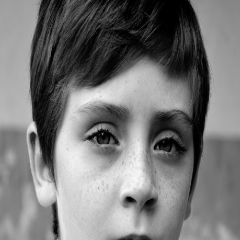

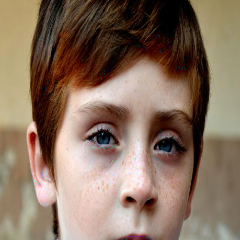

I0000 00:00:1719185450.720772    4155 service.cc:145] XLA service 0x7f3a88002fc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1719185450.720832    4155 service.cc:153]   StreamExecutor device (0): Quadro RTX 4000, Compute Capability 7.5
2024-06-23 23:30:50.796959: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-23 23:30:50.852690: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8902


1/1 - 2s - 2s/step
predicted shape: (1, 240, 240, 3)


I0000 00:00:1719185452.422992    4155 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


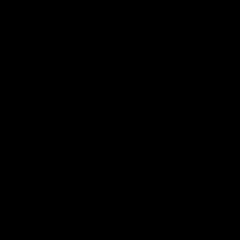

predicted image: [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


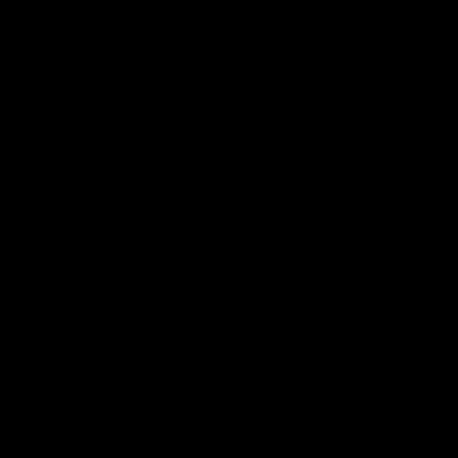

shape of processed_img: (458, 458, 3), postprocess_image: (640, 640, 3), window: (4, 79, 462, 537)


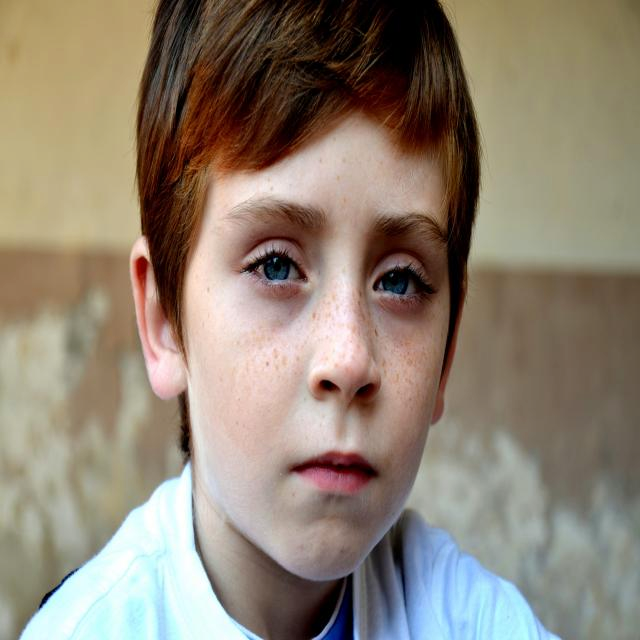

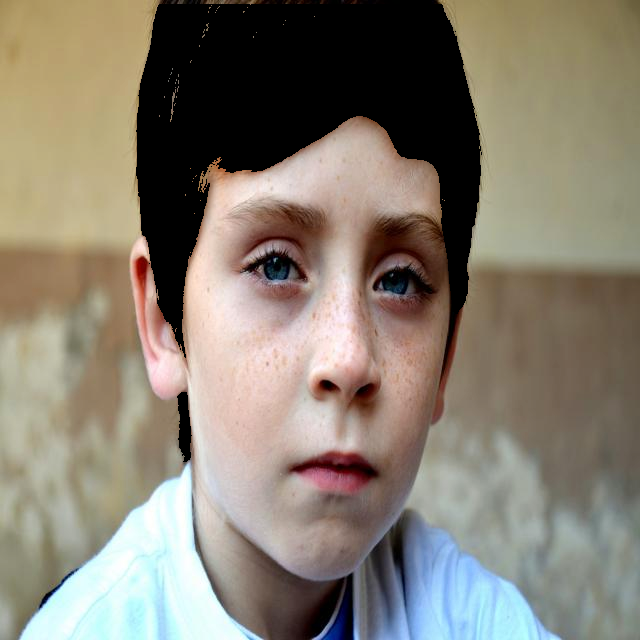

array([[[ 85, 138, 161],
        [ 87, 139, 162],
        [ 88, 140, 163],
        ...,
        [ 59,  93, 104],
        [ 59,  93, 104],
        [ 59,  93, 104]],

       [[ 85, 138, 161],
        [ 87, 139, 162],
        [ 88, 140, 163],
        ...,
        [ 60,  94, 105],
        [ 59,  93, 104],
        [ 59,  93, 104]],

       [[ 87, 139, 162],
        [ 87, 139, 162],
        [ 88, 141, 164],
        ...,
        [ 60,  94, 105],
        [ 60,  94, 105],
        [ 59,  93, 104]],

       ...,

       [[144, 152, 146],
        [144, 152, 146],
        [144, 152, 148],
        ...,
        [120, 128, 123],
        [118, 125, 120],
        [114, 122, 116]],

       [[141, 149, 144],
        [141, 149, 144],
        [141, 149, 145],
        ...,
        [120, 127, 122],
        [117, 124, 119],
        [113, 121, 116]],

       [[140, 147, 142],
        [140, 147, 142],
        [140, 147, 144],
        ...,
        [120, 127, 122],
        [115, 123, 117],
        [112, 120, 115]]

In [3]:
image_path = path.abspath(root_path + f'/../dataset/train/images/pexels-ognjen-karabegovic-3374319_jpg.rf.60ae72069f159326134be6f461775ef0.jpg')
output_dir = root_path
hair_sgment_model_path = path.abspath(root_path + f'/../model/best.pt')
model_path = root_path + f'/model-16.21.weights.h5'
mod.predict(image_path, hue=10, hair_sgment_model_path=hair_sgment_model_path, hair_colorization_model_path=model_path, output_dir=output_dir)